# Importing libraries & Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('daily-website-visitors.csv')
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [4]:
df = df.drop(columns=['Row'])

In [5]:
# Clean commas in number columns
cols = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
for col in cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Day.Of.Week'] = df['Date'].dt.dayofweek        # 0=Monday, 6=Sunday
df['Month'] = df['Date'].dt.month # 1=Jan, 12=Dec
df['Day'] = df['Date'].dt.day  # 1-31
df['IsWeekend'] = df['Day.Of.Week'].isin([5, 6]).astype(int) # 1 if Sat/Sun else 0
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Day                2167 non-null   int32         
 1   Day.Of.Week        2167 non-null   int32         
 2   Date               2167 non-null   datetime64[ns]
 3   Page.Loads         2167 non-null   float64       
 4   Unique.Visits      2167 non-null   float64       
 5   First.Time.Visits  2167 non-null   float64       
 6   Returning.Visits   2167 non-null   float64       
 7   Month              2167 non-null   int32         
 8   IsWeekend          2167 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(4)
memory usage: 118.6 KB


,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Month,IsWeekend
0,14,6,2014-09-14,2146.0,1582.0,1430.0,152.0,9,1
1,15,0,2014-09-15,3621.0,2528.0,2297.0,231.0,9,0
2,16,1,2014-09-16,3698.0,2630.0,2352.0,278.0,9,0


In [8]:
df.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
Day,2167.0,15.730964,1.0,8.0,16.0,23.0,31.0,8.789635
Day.Of.Week,2167.0,2.998616,0.0,1.0,3.0,5.0,6.0,2.001269
Date,2167,2017-09-01 00:00:00,2014-09-14 00:00:00,2016-03-08 12:00:00,2017-09-01 00:00:00,2019-02-24 12:00:00,2020-08-19 00:00:00,NaN
Page.Loads,2167.0,4116.989386,1002.0,3114.5,4106.0,5020.5,7984.0,1350.977843
Unique.Visits,2167.0,2943.646516,667.0,2226.0,2914.0,3667.5,5541.0,977.886472
First.Time.Visits,2167.0,2431.824181,522.0,1830.0,2400.0,3038.0,4616.0,828.704688
Returning.Visits,2167.0,511.822335,133.0,388.5,509.0,626.5,1036.0,168.73637
Month,2167.0,6.498846,1.0,3.5,6.0,10.0,12.0,3.462485
IsWeekend,2167.0,0.285648,0.0,0.0,0.0,1.0,1.0,0.451827


In [9]:
# Create a binary target variable for high traffic days to practice Logistic regression
# Here, we define high traffic as days with above-average page loads
df['HighTraffic'] = (df['Page.Loads'] > df['Page.Loads'].mean()).astype(int)

In [10]:
x = df.drop(columns=['Date', 'Page.Loads', 'HighTraffic'])  # Drop target + leakage
y = df['HighTraffic']

In [11]:
# Use a pipeline to scale and fit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel

pipeline = make_pipeline(
    StandardScaler(),
    SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', C=0.5))
)

In [12]:
pipeline.fit(x, y)  # Fits model for feature selection only
# Get mask of selected features
selector = pipeline.named_steps['selectfrommodel']
selected_mask = selector.get_support()

In [13]:
# Print selected features
selected_features = x.columns[selected_mask]
print("Features selected by L1:", list(selected_features))
X_selected = x[selected_features]

Features selected by L1: ['Day', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits', 'Month', 'IsWeekend']


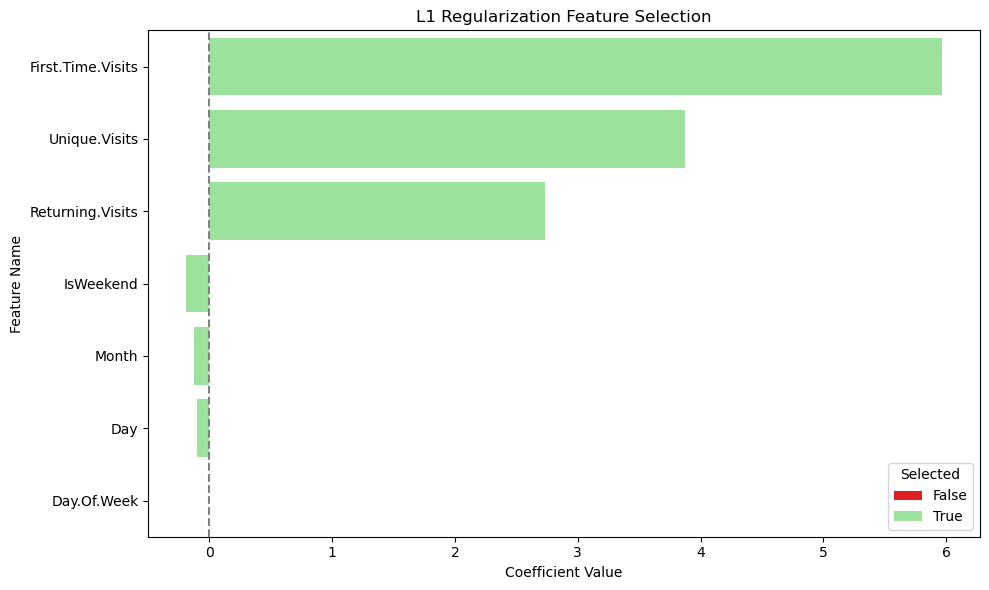

In [14]:
# Extract the logistic regression model
logreg = selector.estimator_
coefficients = logreg.coef_[0]

coef_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': coefficients,
    'Selected': coefficients != 0
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', hue='Selected', palette={True: 'lightgreen', False: 'red'})

plt.title("L1 Regularization Feature Selection")
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

<Axes: >

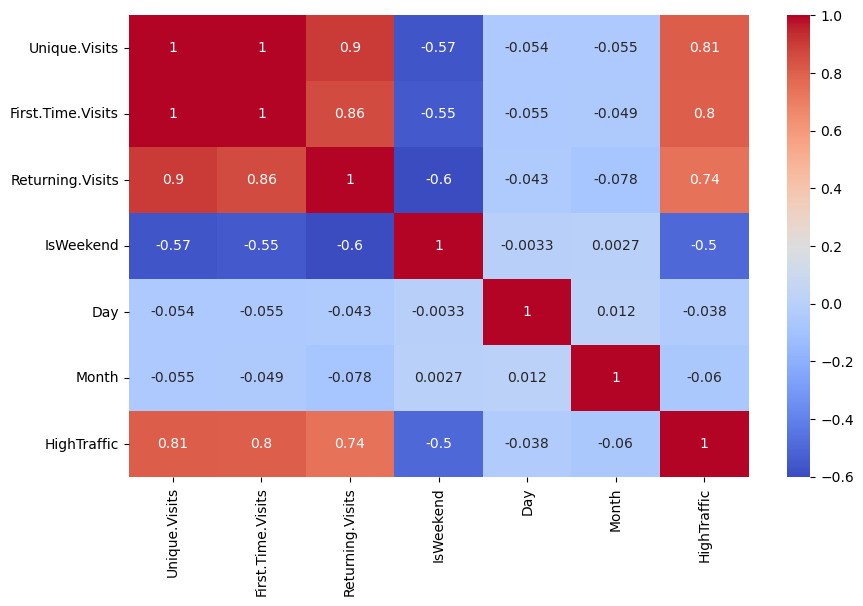

In [15]:
df1 = df[['Unique.Visits', 'First.Time.Visits', 'Returning.Visits','IsWeekend','Day','Month', 'HighTraffic']]
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

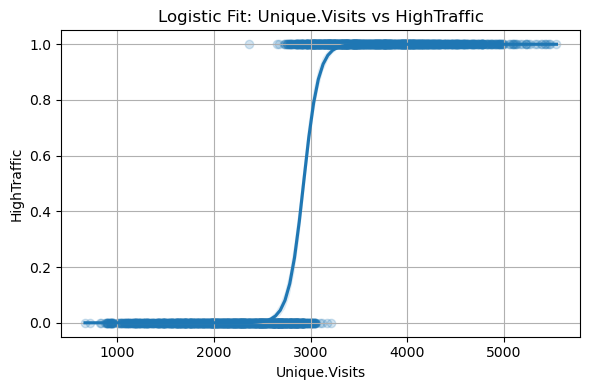

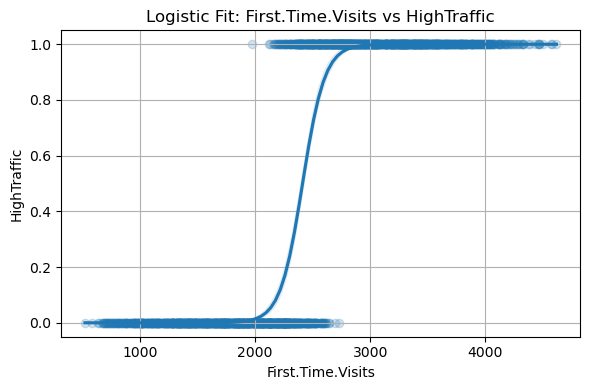

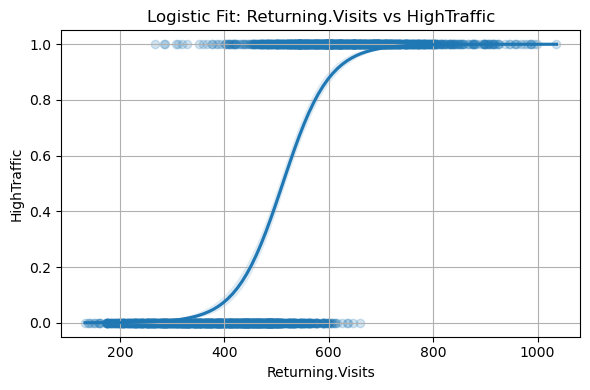

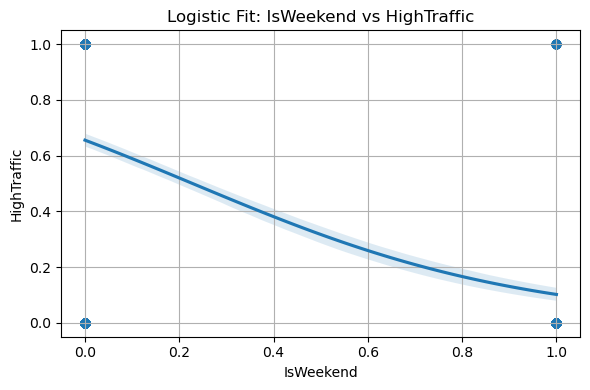

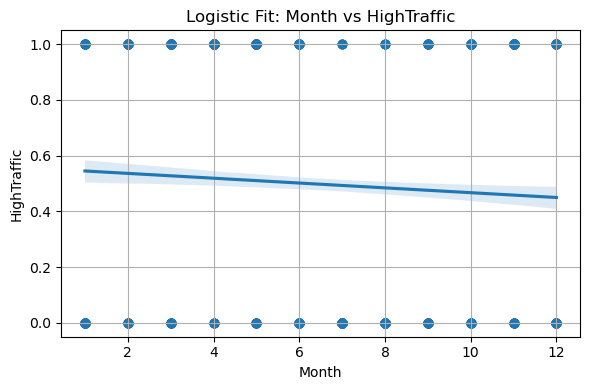

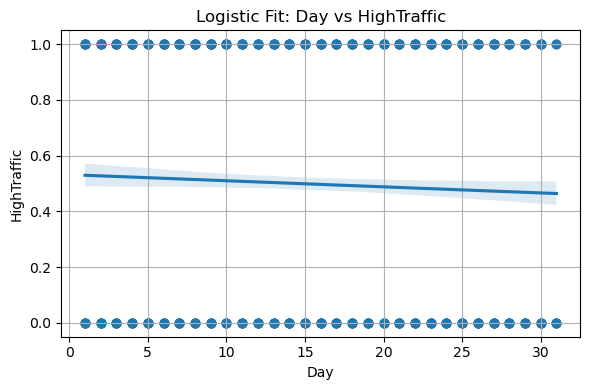

In [16]:
features = ['Unique.Visits', 'First.Time.Visits', 'Returning.Visits', 'IsWeekend', 'Month', 'Day']

import matplotlib.pyplot as plt

for col in features:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=df, x=col, y='HighTraffic', logistic=True, scatter_kws={'alpha':0.2})
    plt.title(f'Logistic Fit: {col} vs HighTraffic')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [17]:
X_selected = x[['Unique.Visits', 'First.Time.Visits', 'Returning.Visits', 'IsWeekend']]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
final_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l1', solver='liblinear', C=0.5)
)
final_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.5, penalty='l1', solver='liblinear'))])

[[201   5]
 [ 13 215]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       206
           1       0.98      0.94      0.96       228

    accuracy                           0.96       434
   macro avg       0.96      0.96      0.96       434
weighted avg       0.96      0.96      0.96       434



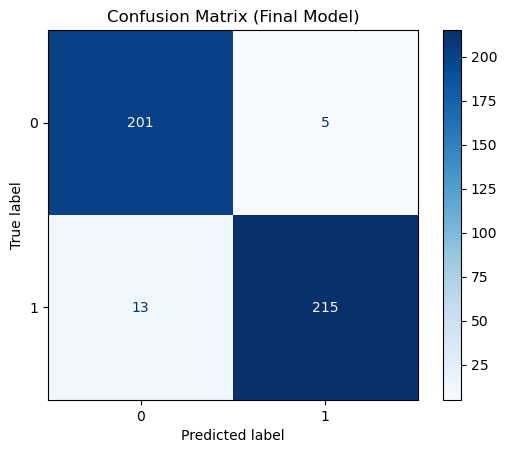

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = final_model.predict(X_test)

# Text report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visual Confusion Matrix
ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix (Final Model)")
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy:.4f} %')


Accuracy: 95.8525 %


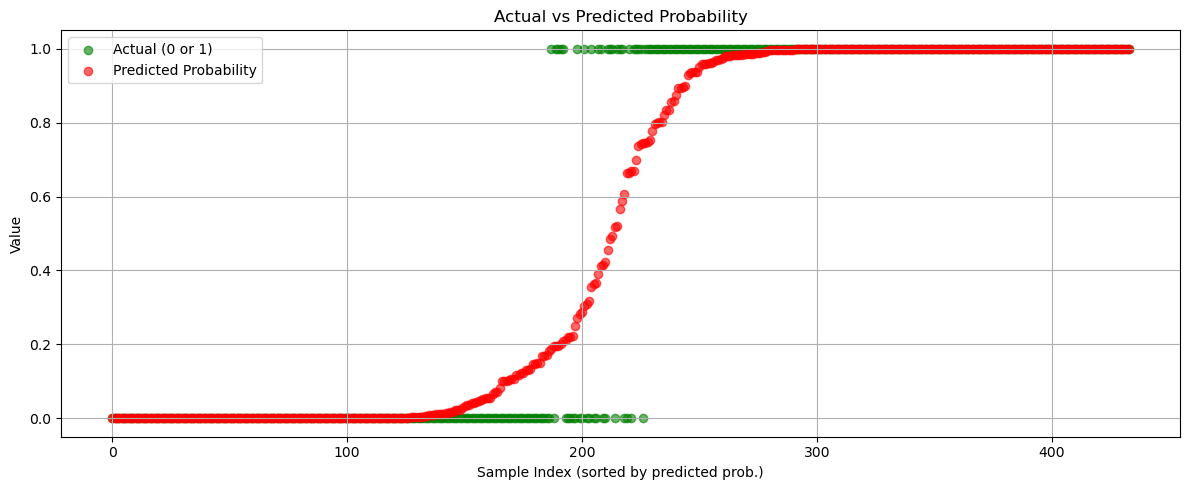

In [20]:
import numpy as np

# Predicted probabilities
y_proba = final_model.predict_proba(X_test)[:, 1]

# Sort for visualization
sorted_idx = np.argsort(y_proba)
y_sorted = y_test.values[sorted_idx]
proba_sorted = y_proba[sorted_idx]

# Plot: Actual vs Predicted Probabilities
plt.figure(figsize=(12, 5))
plt.scatter(range(len(y_sorted)), y_sorted, color='green', label='Actual (0 or 1)', alpha=0.6)
plt.scatter(range(len(proba_sorted)), proba_sorted, color='red', label='Predicted Probability', alpha=0.6)
plt.title("Actual vs Predicted Probability")
plt.ylabel("Value")
plt.xlabel("Sample Index (sorted by predicted prob.)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
